# Star Wars Survey

### About

Analyze the Star Wars survey from collected by [FiveThirtyEight](http://fivethirtyeight.com/)

### Goal

Answer the question: "Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"

#### The [data](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) has several columns, including:
 - RespondentID - An anonymized ID for the respondent (person taking the survey)
 - Gender - The respondent's gender
 - Age - The respondent's age
 - Household Income - The respondent's income
 - Education - The respondent's education level
 - Location (Census Region) - The respondent's location
 - Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
 - Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
star_wars_raw = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars_raw.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars_raw.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

#### Clean rows with empty RespondentID

In [5]:
star_wars = star_wars_raw.loc[pd.notnull(star_wars_raw['RespondentID']),:]

In [6]:
print(star_wars.shape)
print(star_wars_raw.shape)

(1186, 38)
(1187, 38)


#### Clean and convert data in columns Have you seen any of the 6 films in the Star Wars franchise? and Do you consider yourself to be a fan of the Star Wars film franchise? 

In [7]:
bool_answers = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
yes_no = {
    "Yes": True,
    "No": False
}
pd.options.mode.chained_assignment = None  # default='warn'
for col in bool_answers:
    tmp = star_wars[col].map(yes_no)
    star_wars[col] = tmp

#### Clean and convert a bunch of answers related to Which of the following Star Wars films have you seen? Please select all that apply.

Rename columns

In [10]:
new_cols = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
            'Unnamed: 4':'seen_2',
            'Unnamed: 5':'seen_3',
            'Unnamed: 6':'seen_4',
            'Unnamed: 7':'seen_5',
            'Unnamed: 8':'seen_6'}
star_wars = star_wars.rename(columns=new_cols)

In [11]:
for i in range(1,6):
    print(star_wars['seen_'+str(i)].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64


In [12]:
for i in range(1,7):
    star_wars.loc[star_wars['seen_'+str(i)].isnull(), 'seen_'+str(i)] = False
    star_wars.loc[star_wars['seen_'+str(i)] != False, 'seen_'+str(i)] = True

In [13]:
for i in range(1,6):
    print(star_wars['seen_'+str(i)].value_counts(dropna=False))

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64


In [14]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

#### Clean and convert lease rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film column

In [15]:
#rename columns
new_cols = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
            'Unnamed: 10':'ranking_2',
            'Unnamed: 11':'ranking_3',
            'Unnamed: 12':'ranking_4',
            'Unnamed: 13':'ranking_5',
            'Unnamed: 14':'ranking_6'}
star_wars = star_wars.rename(columns=new_cols)

In [16]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [17]:
# convert values to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [18]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Find the highest-ranked movie

In [19]:
movies_names = ['Episode I The Phantom Menace',
                'Episode II Attack of the Clones',
                'Episode III Revenge of the Sith',
                'Episode IV A New Hope',
                'Episode V The Empire Strikes Back',
                'Episode VI Return of the Jedi']

In [20]:
ranking_cols = ['ranking_1', 'ranking_2','ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
movie_rankings = star_wars[ranking_cols].mean()

In [21]:
ranking_dict = dict(zip(ranking_cols,movies_names))
movie_rankings = movie_rankings.rename(index=ranking_dict)

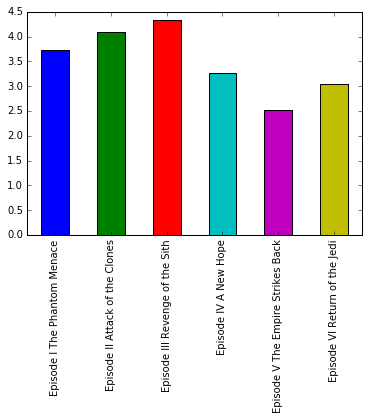

In [22]:
movie_rankings.plot.bar()

## Conclusion:
According to the survey Episode V: The Empire Strikes Back has the highest ranking among other movies in the original Star Wars franchise

## Examine Star Wars movies by popularity

In [30]:
seen_cols = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']
popularity = star_wars[seen_cols].sum()

In [34]:
seen_col_dict = dict(zip(seen_cols,movies_names))
popularity = popularity.rename(index=seen_col_dict)

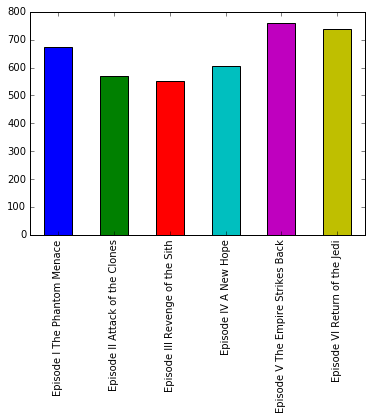

In [35]:
popularity.plot.bar()

## Conclusion:
According to the survey Episode V: The Empire Strikes Back is the most viewed among other movies in the original Star Wars franchise

# Examine ranking and popularity by gender groups

In [36]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## Males

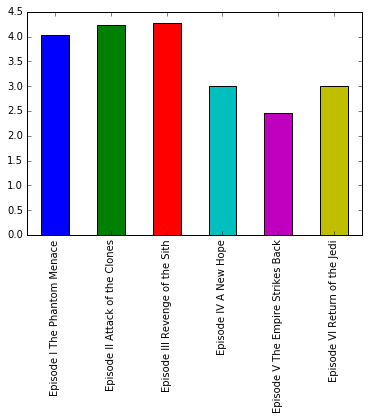

In [38]:
movie_rankings = males[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

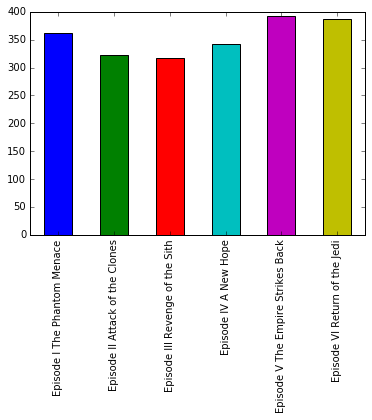

In [42]:
popularity = males[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Conclusion:
Results for male only is the same as for whole survey

## Female

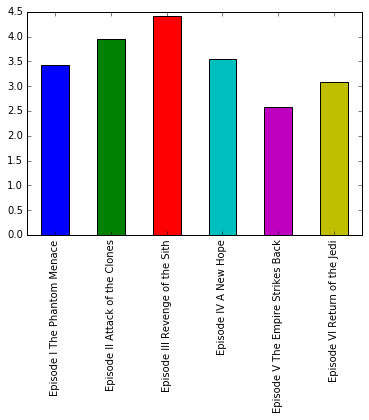

In [40]:
movie_rankings = females[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

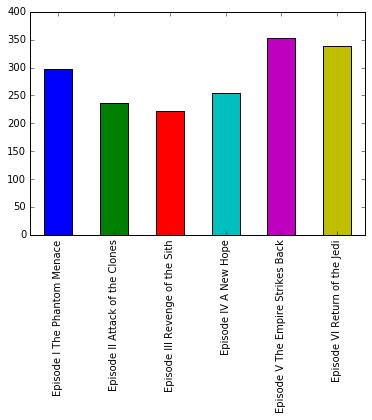

In [41]:
popularity = females[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Conclusion:
Results for male only is the same as for whole survey

## Examine ranking and popularity for Star Trek fans

In [59]:
st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'Yes']
not_st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'No']

### Star Trek fans

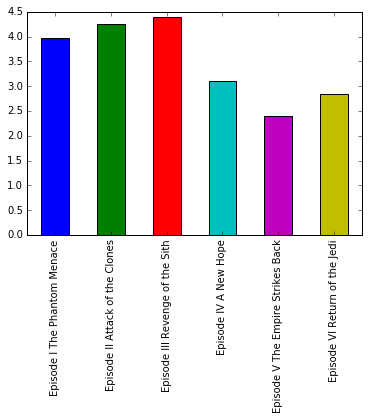

In [60]:
movie_rankings = st_fan[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

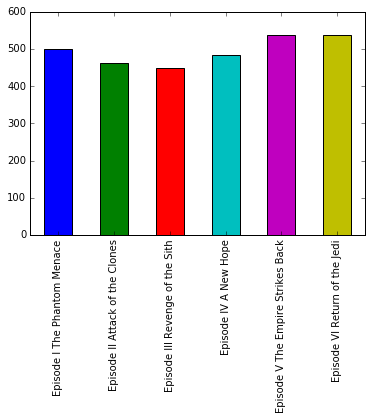

In [72]:
popularity = st_fan[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Not Star Trek fans

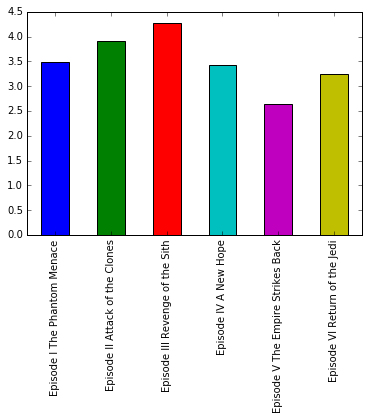

In [62]:
movie_rankings = not_st_fan[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

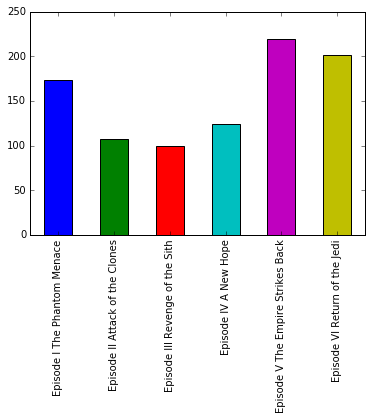

In [71]:
popularity = not_st_fan[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Conclusion:
Still the same

## Examine ranking and popularity for Star Wars fans

In [66]:
sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

### Star Wars fans

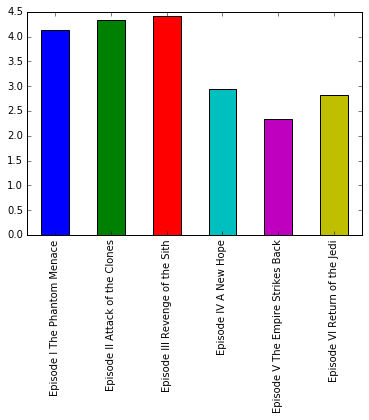

In [67]:
movie_rankings = sw_fan[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

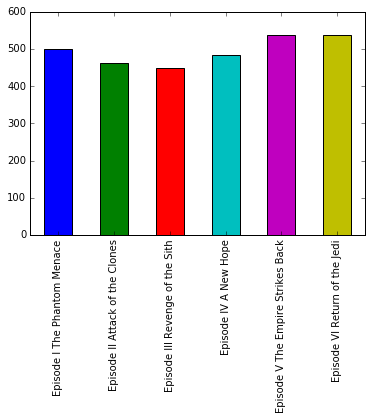

In [68]:
popularity = sw_fan[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Not Star Trek fans

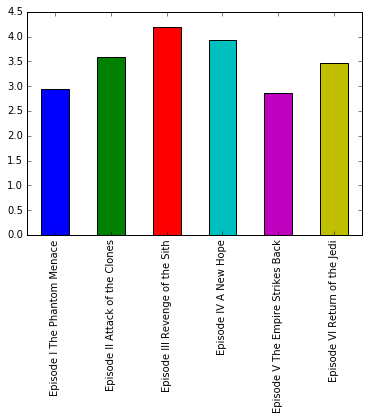

In [69]:
movie_rankings = not_sw_fan[ranking_cols].mean()
movie_rankings = movie_rankings.rename(index=ranking_dict)
movie_rankings.plot.bar()

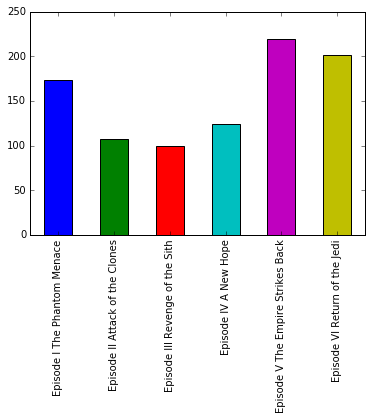

In [70]:
popularity = not_sw_fan[seen_cols].sum()
popularity = popularity.rename(index=seen_col_dict)
popularity.plot.bar()

### Conclusion:
Still the same

# Overall conclusion:


**According to survey America does realize that Star Wars: Episode V The Empire Strikes Back is clearly the best of the bunch**